In [1]:
from kloppy import skillcorner
from mplsoccer import Pitch, VerticalPitch
from pathlib import Path
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import re

In [2]:
matches = pd.read_json("https://raw.githubusercontent.com/SkillCorner/opendata/refs/heads/master/data/matches.json")

In [3]:
matches.iloc[0]

id                                                            2017461
date_time                                   2025-05-17 09:35:00+00:00
home_team                 {'id': 868, 'short_name': 'Melbourne V FC'}
away_team                   {'id': 4177, 'short_name': 'Auckland FC'}
status                                                         closed
competition_id                                                     61
season_id                                                          95
competition_edition_id                                            870
Name: 0, dtype: object

In [4]:
background_color = '#F5F5F5'
primary_text_color = '#000000'
secondary_text_color = '#757575'
primary_color = '#649CCB'
highlight_color = "#203490"

cmap = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           [background_color, "#203490"], N=200)

In [5]:
match_id = 1886347

tracking_data_github_url = f"https://media.githubusercontent.com/media/SkillCorner/opendata/master/data/matches/{match_id}/{match_id}_tracking_extrapolated.jsonl"
meta_data_github_url = f"https://raw.githubusercontent.com/SkillCorner/opendata/master/data/matches/{match_id}/{match_id}_match.json"


dataset = skillcorner.load(
    meta_data=meta_data_github_url,
    raw_data=tracking_data_github_url,
    # Optional Parameters
    coordinates="skillcorner",  # or specify a different coordinate system
    sample_rate=(1 / 2),  # changes the data from 10fps to 5fps
    # limit=100,  # only load the first 100 frames
)



In [6]:
df = (
    dataset.transform(
        to_orientation="STATIC_HOME_AWAY"
    )  # Now, all attacks happen from left to right
    # .filter(lambda frame: frame.period.id == 1)  # Only keep frames from the first half
    .to_df(
        engine="pandas"
    )  # Convert to a Polars DataFrame, or use engine="pandas" for a Pandas DataFrame
)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15756 entries, 0 to 15755
Columns: 125 entries, period_id to 797297_s
dtypes: float64(61), int64(3), object(60), timedelta64[ns](1)
memory usage: 15.0+ MB


In [8]:
df.describe()[['ball_x','ball_y']]

,ball_x,ball_y
count,15750.000000,15750.000000
mean,7.192460,1.421757
std,24.395012,19.728106
min,-52.930000,-34.740000
25%,-10.880000,-15.740000
50%,8.530000,1.805000
75%,26.600000,18.607500
max,53.900000,35.880000


In [9]:
df.columns

Index(['period_id', 'timestamp', 'frame_id', 'ball_state',
       'ball_owning_team_id', 'ball_x', 'ball_y', 'ball_z', 'ball_speed',
       '51009_x',
       ...
       '31147_d', '31147_s', '800320_x', '800320_y', '800320_d', '800320_s',
       '797297_x', '797297_y', '797297_d', '797297_s'],
      dtype='object', length=125)

In [10]:
summary = {
    "n_frames": len(df),
    "periods": df['period_id'].nunique(),
    "first_period_n_frames": len(df[df['period_id'] == 1]),
    "first_period_first_frame_id": df[df['period_id'] == 1]['frame_id'].min(),
    "first_period_last_frame_id": df[df['period_id'] == 1]['frame_id'].max(),
    "second_period_n_frames": len(df[df['period_id'] == 2]),
    "second_period_first_frame_id": df[df['period_id'] == 2]['frame_id'].min(),
    "second_period_last_frame_id": df[df['period_id'] == 2]['frame_id'].max(),
    "first_period_time_s_min": df[df['period_id'] == 1]['timestamp'].min(),
    "first_period_time_s_max": df[df['period_id'] == 1]['timestamp'].max(),
    "second_period_time_s_min": df[df['period_id'] == 2]['timestamp'].min(),
    "second_period_time_s_max": df[df['period_id'] == 2]['timestamp'].max(),
    "ball_x_range": (df['ball_x'].min(), df['ball_x'].max()),
    "ball_y_range": (df['ball_y'].min(), df['ball_y'].max()),
}
summary

{'n_frames': 15756,
 'periods': 2,
 'first_period_n_frames': 8707,
 'first_period_first_frame_id': np.int64(28),
 'first_period_last_frame_id': np.int64(27682),
 'second_period_n_frames': 7049,
 'second_period_first_frame_id': np.int64(27821),
 'second_period_last_frame_id': np.int64(58931),
 'first_period_time_s_min': Timedelta('0 days 00:00:01.800000'),
 'first_period_time_s_max': Timedelta('0 days 00:46:07.200000'),
 'second_period_time_s_min': Timedelta('0 days 00:00:02.100000'),
 'second_period_time_s_max': Timedelta('0 days 00:51:53.100000'),
 'ball_x_range': (np.float64(-52.93), np.float64(53.9)),
 'ball_y_range': (np.float64(-34.74), np.float64(35.88))}

In [11]:
dataset.metadata

Metadata(periods=[Period(id=1, start_timestamp=datetime.timedelta(seconds=1), end_timestamp=datetime.timedelta(seconds=2779), prev_period=None, next_period=Period(id=2, start_timestamp=datetime.timedelta(seconds=2780), end_timestamp=datetime.timedelta(seconds=5906), prev_period=..., next_period=None)), Period(id=2, start_timestamp=datetime.timedelta(seconds=2780), end_timestamp=datetime.timedelta(seconds=5906), prev_period=Period(id=1, start_timestamp=datetime.timedelta(seconds=1), end_timestamp=datetime.timedelta(seconds=2779), prev_period=None, next_period=...), next_period=None)], teams=[Team(team_id=4177, name='Auckland FC', ground=home, starting_formation=None, formations=<TimeContainer>, players=[<Player name='Guillermo Luis May Bartesaghi' player_id='38673'>, <Player name='Callan Elliot' player_id='51713'>, <Player name='Jake Brimmer' player_id='50951'>, <Player name='Francis De Vries' player_id='133498'>, <Player name='Nando Pijnaker' player_id='33697'>, <Player name='Daniel Ha

In [12]:
home_team, away_team = dataset.metadata.teams

players = {}
for player in home_team.players:
    player_dict = {}
    player_dict['player_id'] = int(player.player_id)
    player_dict['jersey_no'] = player.jersey_no
    player_dict['first_name'] = player.first_name
    player_dict['last_name'] = player.last_name
    player_dict['name'] = player.name
    player_dict['team_id'] = home_team.team_id
    print(player.position)

    players[player.player_id] = player_dict
for player in away_team.players:
    player_dict = {}
    player_dict['player_id'] = int(player.player_id)
    player_dict['jersey_no'] = player.jersey_no
    player_dict['first_name'] = player.first_name
    player_dict['last_name'] = player.last_name
    player_dict['name'] = player.name
    player_dict['team_id'] = away_team.team_id
    players[player.player_id] = player_dict

df_players_info = pd.DataFrame.from_dict(players, orient='index')

Striker
Unknown
Striker
Unknown
Left Center Back
Right Center Back
Defensive Midfield
Left Wing
None
None
None
Right Wing
Attacking Midfield
None
None
None
None
Unknown


/var/folders/gc/cfqf4zyd1hlcrhp_j3h6bxr80000gn/T/ipykernel_23517/200300711.py:12: DeprecationWarning: Call to deprecated function position (starting_position or positions should be used).
  print(player.position)
/var/folders/gc/cfqf4zyd1hlcrhp_j3h6bxr80000gn/T/ipykernel_23517/200300711.py:12: DeprecationWarning: Call to deprecated function position (starting_position or positions should be used).
  print(player.position)
/var/folders/gc/cfqf4zyd1hlcrhp_j3h6bxr80000gn/T/ipykernel_23517/200300711.py:12: DeprecationWarning: Call to deprecated function position (starting_position or positions should be used).
  print(player.position)
/var/folders/gc/cfqf4zyd1hlcrhp_j3h6bxr80000gn/T/ipykernel_23517/200300711.py:12: DeprecationWarning: Call to deprecated function position (starting_position or positions should be used).
  print(player.position)
/var/folders/gc/cfqf4zyd1hlcrhp_j3h6bxr80000gn/T/ipykernel_23517/200300711.py:12: DeprecationWarning: Call to deprecated function position (starting

In [13]:
away_team.team_id

1805

In [14]:



player_cols = [c for c in df.columns if re.match(r'\d+_(x|y|d|s)', c)]


# Pasar a formato largo
df_long = (
    df.melt(
        id_vars=['frame_id', 'timestamp', 'period_id', 'ball_state', 'ball_owning_team_id', 'ball_x', 'ball_y'],
        value_vars=player_cols,
        var_name='player_metric',
        value_name='value'
    )
)

# Separar player_id y métrica (_x, _y, _d, _s)
df_long[['player_id', 'metric']] = df_long['player_metric'].str.extract(r'(\d+)_(x|y|d|s)')

df_long['player_id'] = df_long['player_id'].astype(int)

# Pivotar para tener una fila por jugador por frame
df_players = df_long.pivot_table(
    index=['frame_id', 'timestamp', 'period_id', 'ball_state', 'ball_owning_team_id', 'ball_x', 'ball_y', 'player_id'],
    columns='metric',
    values='value'
).reset_index()




In [15]:
df_players = df_players.merge(df_players_info, on='player_id', how='left')

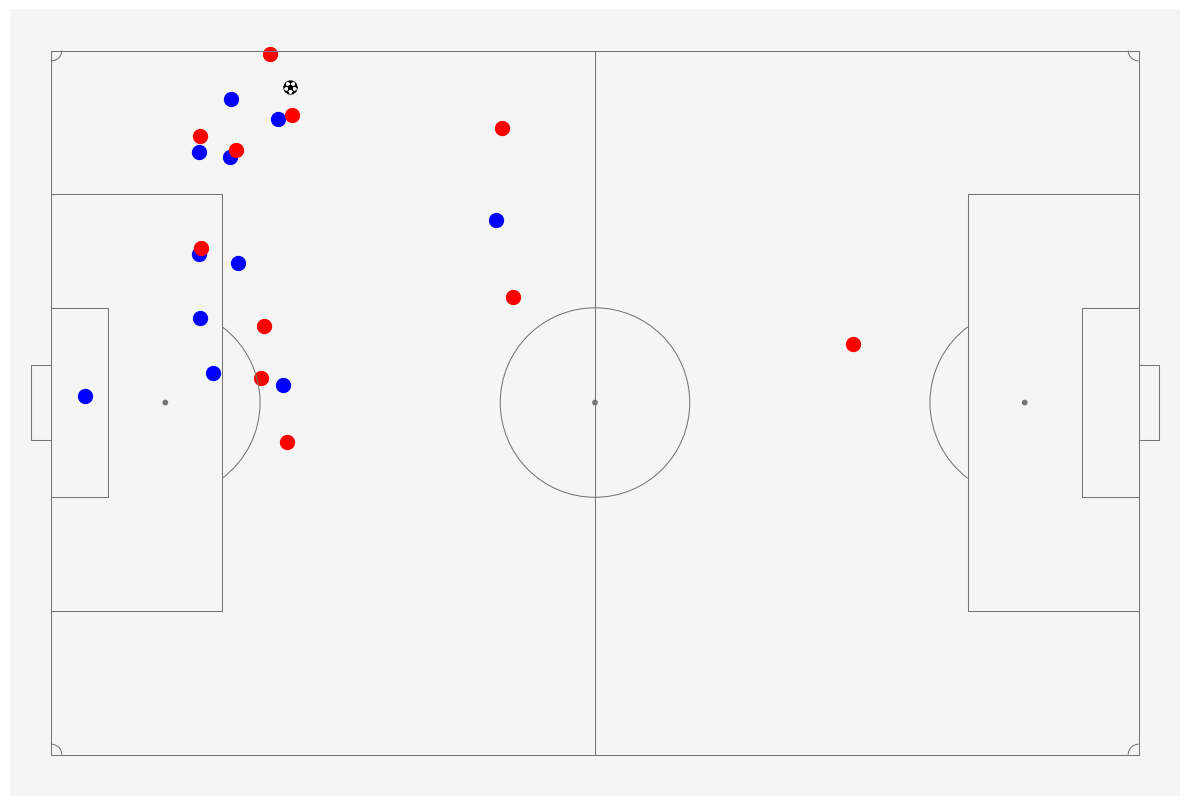

In [16]:
frame_id = 1000
home_id = home_team.team_id
away_id = away_team.team_id

frame_df = df_players[df_players.frame_id == frame_id]

pitch = Pitch(pitch_type='skillcorner',
                      line_zorder=10,
                      line_color=secondary_text_color,
                      half=False,
                    pitch_color=background_color,
                      linewidth=.75,
                      axis=False,
                      corner_arcs=True,
                      goal_type='box',
                      pitch_length=105, pitch_width=68)
fig, ax = pitch.draw(figsize=(12, 10))

ball_position = frame_df[['ball_x', 'ball_y']].drop_duplicates()
#ball plot
pitch.scatter(ball_position.ball_x, ball_position.ball_y,
                   # size varies between 100 and 1900 (points squared)
                   s=100,
                   marker='football',
                   ax=ax)

home_players = frame_df[frame_df.team_id == home_id]
pitch.scatter(home_players.x, home_players.y,
                   # size varies between 100 and 1900 (points squared)
                   s=100,
                   marker='o',
                   color='blue',
                   ax=ax)

away_players = frame_df[frame_df.team_id == away_id]
pitch.scatter(away_players.x, away_players.y,
                   # size varies between 100 and 1900 (points squared)
                   s=100,
                   marker='o',
                   color='red',
                   ax=ax)


<Axes: >

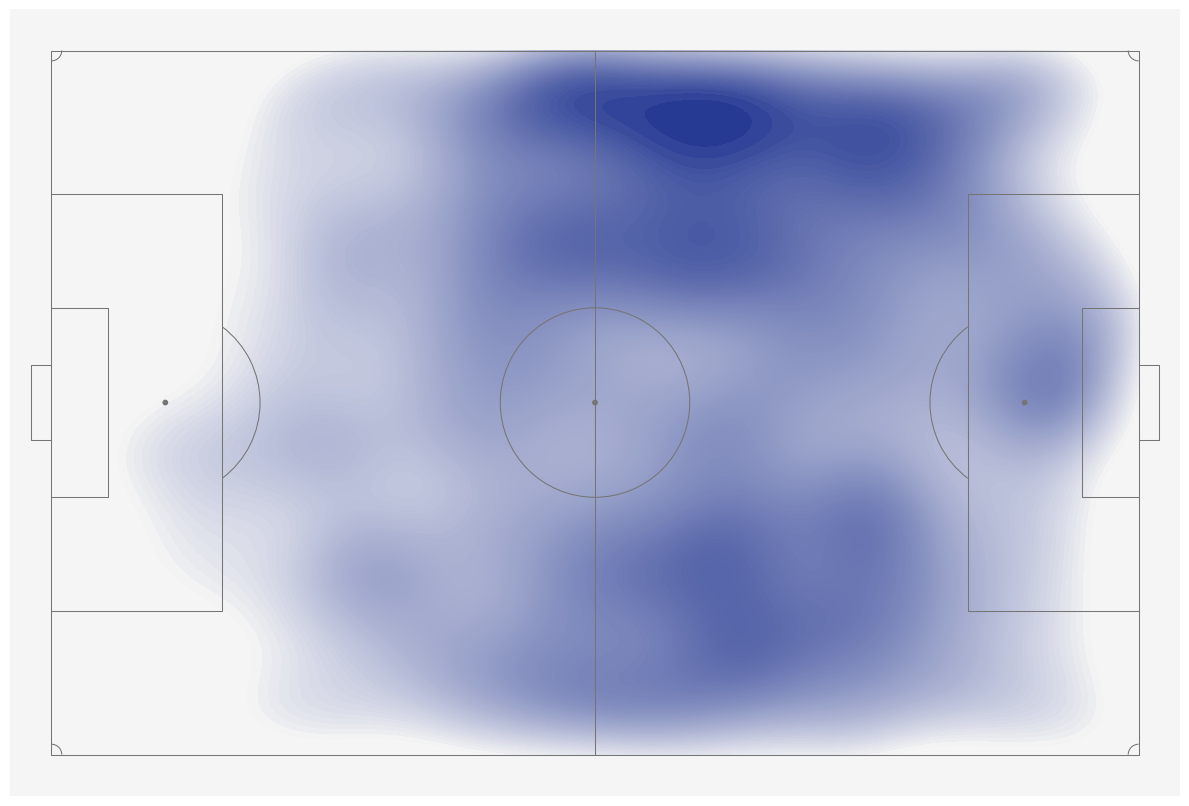

In [17]:
ball_position = df_players[['frame_id', 'ball_x', 'ball_y']].drop_duplicates()

pitch = Pitch(pitch_type='skillcorner',
                      line_zorder=10,
                      line_color=secondary_text_color,
                      half=False,
                    pitch_color=background_color,
                      linewidth=.75,
                      axis=False,
                      corner_arcs=True,
                      goal_type='box',
                      pitch_length=105, pitch_width=68)

# pitch = Pitch(
#     half=False, goal_type='box', pad_bottom=-0.2,
#     line_color="#cfcfcf",
#     line_zorder=1,
#     pitch_type="skillcorner",
#     pitch_length=105, pitch_width=68
# )
fig, ax = pitch.draw(figsize=(12, 10))

pitch.kdeplot(ball_position.ball_x, ball_position.ball_y, ax=ax, cmap=cmap, fill=True, levels=100)

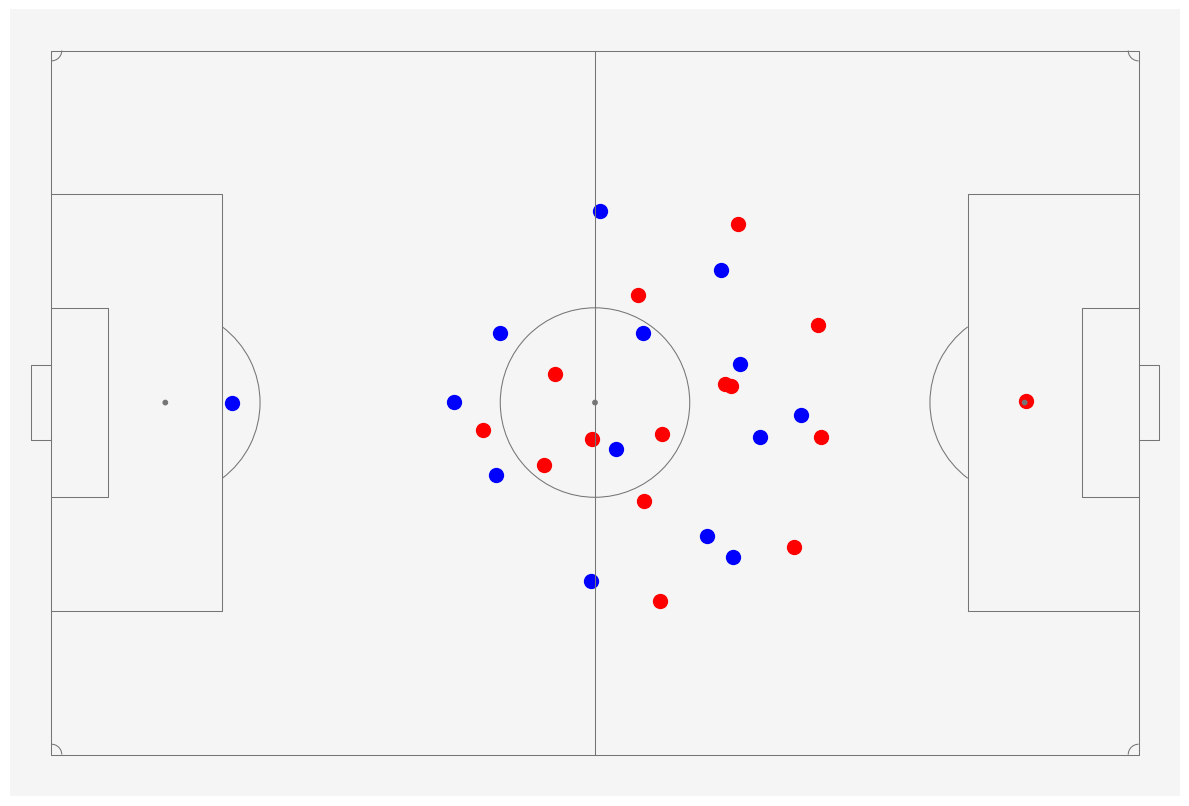

In [18]:
pitch = Pitch(pitch_type='skillcorner',
                      line_zorder=10,
                      line_color=secondary_text_color,
                      half=False,
                    pitch_color=background_color,
                      linewidth=.75,
                      axis=False,
                      corner_arcs=True,
                      goal_type='box',
                      pitch_length=105, pitch_width=68)

fig, ax = pitch.draw(figsize=(12, 10))

home_players_positions = df_players[df_players.team_id == home_id].groupby('player_id').agg({'x':'mean', 'y':'mean'}).reset_index()
away_players_positions = df_players[df_players.team_id == away_id].groupby('player_id').agg({'x':'mean', 'y':'mean'}).reset_index()
# ball_position 

pitch.scatter(home_players_positions.x, home_players_positions.y,
                   # size varies between 100 and 1900 (points squared)
                   s=100,
                   marker='o',
                   color='blue',
                   ax=ax)

pitch.scatter(away_players_positions.x, away_players_positions.y,
                   # size varies between 100 and 1900 (points squared)
                   s=100,
                   marker='o',
                   color='red',
                   ax=ax)


In [19]:
def load_tracking(match_id):
    tracking_data_github_url = f"https://media.githubusercontent.com/media/SkillCorner/opendata/master/data/matches/{match_id}/{match_id}_tracking_extrapolated.jsonl"
    meta_data_github_url = f"https://raw.githubusercontent.com/SkillCorner/opendata/master/data/matches/{match_id}/{match_id}_match.json"


    dataset = skillcorner.load(
        meta_data=meta_data_github_url,
        raw_data=tracking_data_github_url,
        # Optional Parameters
        coordinates="skillcorner",  # or specify a different coordinate system
        sample_rate=(1 / 2),  # changes the data from 10fps to 5fps
        # limit=100,  # only load the first 100 frames
    )
    return dataset

def convert_to_dataframe(dataset):
    return dataset.transform(to_orientation="STATIC_HOME_AWAY").to_df(engine='pandas')

def get_players_dataframe(match_id):
    dataset = load_tracking(match_id)
    home_team, away_team = dataset.metadata.teams

    players = {}
    for player in home_team.players:
        player_dict = {}
        player_dict['player_id'] = int(player.player_id)
        player_dict['jersey_no'] = player.jersey_no
        player_dict['first_name'] = player.first_name
        player_dict['last_name'] = player.last_name
        player_dict['name'] = player.name
        player_dict['team_id'] = home_team.team_id

        players[player.player_id] = player_dict
    for player in away_team.players:
        player_dict = {}
        player_dict['player_id'] = int(player.player_id)
        player_dict['jersey_no'] = player.jersey_no
        player_dict['first_name'] = player.first_name
        player_dict['last_name'] = player.last_name
        player_dict['name'] = player.name
        player_dict['team_id'] = away_team.team_id
        players[player.player_id] = player_dict

    df_players_info = pd.DataFrame.from_dict(players, orient='index')

    player_cols = [c for c in df.columns if re.match(r'\d+_(x|y|d|s)', c)]

    # Pasar a formato largo
    df_long = (
        df.melt(
            id_vars=['frame_id', 'timestamp', 'period_id', 'ball_state', 'ball_owning_team_id', 'ball_x', 'ball_y'],
            value_vars=player_cols,
            var_name='player_metric',
            value_name='value'
        )
    )

    # Separar player_id y métrica (_x, _y, _d, _s)
    df_long[['player_id', 'metric']] = df_long['player_metric'].str.extract(r'(\d+)_(x|y|d|s)')

    df_long['player_id'] = df_long['player_id'].astype(int)

    # Pivotar para tener una fila por jugador por frame
    df_players = df_long.pivot_table(
        index=['frame_id', 'timestamp', 'period_id', 'ball_state', 'ball_owning_team_id', 'ball_x', 'ball_y', 'player_id'],
        columns='metric',
        values='value'
    ).reset_index()
    
    return df_players.merge(df_players_info, on='player_id', how='left')

def get_teams_info(match_id):
    dataset = load_tracking(match_id)
    return dataset.metadata.teams

def plot_frame(df, frame_id, teams_info):
    home_team, away_team = teams_info.teams
    home_id = home_team.team_id
    away_id = away_team.team_id

    frame_df = df_players[df_players.frame_id == frame_id]

    pitch = Pitch(pitch_type='skillcorner',
                        line_zorder=10,
                        line_color=secondary_text_color,
                        half=False,
                        pitch_color=background_color,
                        linewidth=.75,
                        axis=False,
                        corner_arcs=True,
                        goal_type='box',
                        pitch_length=105, pitch_width=68)
    fig, ax = pitch.draw(figsize=(12, 10))

    ball_position = frame_df[['ball_x', 'ball_y']].drop_duplicates()
    #ball plot
    pitch.scatter(ball_position.ball_x, ball_position.ball_y,
                    # size varies between 100 and 1900 (points squared)
                    s=100,
                    marker='football',
                    ax=ax)

    home_players = frame_df[frame_df.team_id == home_id]
    pitch.scatter(home_players.x, home_players.y,
                    # size varies between 100 and 1900 (points squared)
                    s=100,
                    marker='o',
                    color='blue',
                    ax=ax)

    away_players = frame_df[frame_df.team_id == away_id]
    pitch.scatter(away_players.x, away_players.y,
                    # size varies between 100 and 1900 (points squared)
                    s=100,
                    marker='o',
                    color='red',
                    ax=ax)